# Feature Selection (RFE) Strategies for Improved Classification (Decision Tree) 

## Import Library 

In [16]:
import pandas as pd #manipulasi & analisis data tabular 
import numpy as np #operasi numerik dan manipulasi array
import matplotlib.pyplot as plt #visualisasi data dasar seperti diagram batang, grafik lingkaran, dan diagram sebar.
import seaborn as sns # visualisasi data statistik yang lebih canggih dan informatif.
from scipy.stats import pearsonr, spearmanr # uji statistik, khususnya uji korelasi.  
from sklearn.preprocessing import LabelEncoder #penangan data kategorikal 
from sklearn.model_selection import train_test_split #pembagian dataset  
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 

## Data Understanding 

In [3]:
#read data
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head() 

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
print('Information:')
df.info()  

Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
print(df.apply(lambda col: col.unique())) #displays unique values for each coloumn   

Person ID                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Gender                                                        [Male, Female]
Age                        [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
Occupation                 [Software Engineer, Doctor, Sales Representati...
Sleep Duration             [6.1, 6.2, 5.9, 6.3, 7.8, 6.0, 6.5, 7.6, 7.7, ...
Quality of Sleep                                          [6, 4, 7, 5, 8, 9]
Physical Activity Level    [42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 5...
Stress Level                                              [6, 8, 7, 4, 3, 5]
BMI Category                      [Overweight, Normal, Obese, Normal Weight]
Blood Pressure             [126/83, 125/80, 140/90, 120/80, 132/87, 130/8...
Heart Rate                 [77, 75, 85, 82, 70, 80, 78, 69, 72, 68, 76, 8...
Daily Steps                [4200, 10000, 3000, 3500, 8000, 4000, 4100, 68...
Sleep Disorder                          [No Disorder, Sleep Apnea, Insomnia]

## Data Preprocessing 

In [6]:
#Penanganan Variabel Blood Pressure 
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)
df = df.drop('Blood Pressure', axis=1)  

In [7]:
# List variabel yang tidak diinginkan
unwanted_columns = ['Person ID', 'Occupation']

# Menghapus variabel yang tidak diinginkan
df = df.drop(unwanted_columns, axis=1)  

In [8]:
df.head()   

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,Male,27,6.1,6,42,6,Overweight,77,4200,No Disorder,126,83
1,Male,28,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
2,Male,28,6.2,6,60,8,Normal,75,10000,No Disorder,125,80
3,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [9]:
#Penanganan Variabel Kategorikal
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['BMI Category'] = label_encoder.fit_transform(df['BMI Category'])
df['Sleep Disorder'] = label_encoder.fit_transform(df['Sleep Disorder'])  

In [10]:
print(df.apply(lambda col: col.unique())) #displays unique values for each coloumn   

Gender                                                                [1, 0]
Age                        [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
Sleep Duration             [6.1, 6.2, 5.9, 6.3, 7.8, 6.0, 6.5, 7.6, 7.7, ...
Quality of Sleep                                          [6, 4, 7, 5, 8, 9]
Physical Activity Level    [42, 60, 30, 40, 75, 35, 45, 50, 32, 70, 80, 5...
Stress Level                                              [6, 8, 7, 4, 3, 5]
BMI Category                                                    [3, 0, 2, 1]
Heart Rate                 [77, 75, 85, 82, 70, 80, 78, 69, 72, 68, 76, 8...
Daily Steps                [4200, 10000, 3000, 3500, 8000, 4000, 4100, 68...
Sleep Disorder                                                     [1, 2, 0]
Systolic BP                [126, 125, 140, 120, 132, 130, 117, 118, 128, ...
Diastolic BP               [83, 80, 90, 87, 86, 76, 85, 84, 75, 88, 78, 7...
dtype: object


In [12]:
#Hitung Matriks Korelasi
correlation_matrix = df.corr()  

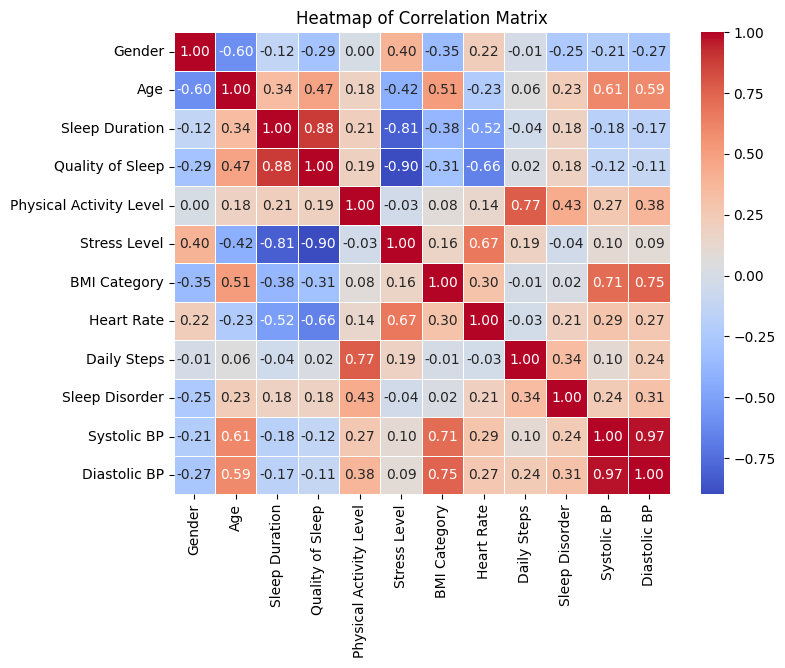

In [13]:
# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()  

## Decision Tree   

In [14]:
# Pisahkan fitur (X) dan variabel target (y)
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Latih model pada data latih
decision_tree_model.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = decision_tree_model.predict(X_test) 

### Hasil Akurasi 

In [17]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')  

Accuracy: 0.8933333333333333
Confusion Matrix:
[[13  1  2]
 [ 1 42  0]
 [ 3  1 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.98      0.97        43
           2       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75



##  Decision Tree with RFE 

In [19]:
# Inisialisasi model yang ingin digunakan (Decision Tree Classifier)
model = DecisionTreeClassifier()

# Inisialisasi RFE dengan model dan jumlah fitur yang ingin dipertahankan
rfe = RFE(model, n_features_to_select=5)

# Melakukan seleksi fitur
fit = rfe.fit(X, y)

# Menampilkan ranking fitur dan support
print("Feature Ranking:", fit.ranking_) 
print("Selected Features:", X.columns[fit.support_]) 

Feature Ranking: [3 1 1 6 1 5 1 7 4 1 2]
Selected Features: Index(['Age', 'Sleep Duration', 'Physical Activity Level', 'BMI Category',
       'Systolic BP'],
      dtype='object')


In [20]:
# Menggunakan hanya fitur yang telah dipilih melalui RFE
selected_features = X.columns[fit.support_]
X_selected = X[selected_features]

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Inisialisasi model Decision Tree Classifier
model_c45 = DecisionTreeClassifier()

# Melatih model pada set pelatihan
model_c45.fit(X_train, y_train)

# Melakukan prediksi pada set pengujian
y_pred = model_c45.predict(X_test) 

In [21]:
# Evaluasi model Decision Tree- RFE
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))  

Accuracy: 0.9066666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.95      0.98      0.97        43
           2       0.87      0.81      0.84        16

    accuracy                           0.91        75
   macro avg       0.88      0.87      0.87        75
weighted avg       0.91      0.91      0.91        75



## Hasil Analisis 

- Model dengan RFE memiliki akurasi yang lebih tinggi (90.67%) dibandingkan dengan model tanpa RFE (89.33%).
- Meskipun akurasi lebih tinggi dengan RFE, perlu mempertimbangkan faktor lain seperti interpretabilitas dan efisiensi komputasional.
- Model dengan RFE tetap memberikan nilai precision, recall, dan f1-score yang baik untuk setiap kelas.
- Dengan RFE, model dapat memilih subset fitur yang dianggap paling relevan untuk meningkatkan kinerja.

Saran: Pilih model berdasarkan kebutuhan spesifik tugas dan preferensi. Model dengan RFE cenderung memberikan akurasi yang baik dan memiliki potensi untuk meningkatkan efisiensi model dengan memilih fitur yang lebih relevan. 